# Data and Variable

- 간단한 forward pass 함수로부터 gradient descent 이루어지는 과정


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = torch.tensor([1.0], requires_grad=True)

#forward pass 함수
def forward(x):
    return x * w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y) ** 2 

for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        l = loss(x_val, y_val) #loss 함수를 실행시키면, forward까지 이루어져서 loss저장
        l.backward() #gradient를 직접 구할필요없이, 모든 변수마다 gradient 갱신하는 back propation 진행해줌!!(매우 유용)
        print("\tgrad: ", x_val, y_val, w.grad.item())
        w.data = w.data - 0.01 * w.grad.item() #gradient descent를 수행하는 부분 (갱신)
        w.grad.data.zero_() # gradient인 미분값을 다시 0으로 세팅해주어야함 (data는 계속 업데이트해야되니 초기화하는게 아니고!)
    print(f"Epoch: {epoch} | Loss: {l.item()}")

print("Prediction (after training)", 4, forward(4).item())

	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.840000152587891
	grad:  3.0 6.0 -16.228801727294922
Epoch: 0 | Loss: 7.315943717956543
	grad:  1.0 2.0 -1.478623867034912
	grad:  2.0 4.0 -5.796205520629883
	grad:  3.0 6.0 -11.998146057128906
Epoch: 1 | Loss: 3.9987640380859375
	grad:  1.0 2.0 -1.0931644439697266
	grad:  2.0 4.0 -4.285204887390137
	grad:  3.0 6.0 -8.870372772216797
Epoch: 2 | Loss: 2.1856532096862793
	grad:  1.0 2.0 -0.8081896305084229
	grad:  2.0 4.0 -3.1681032180786133
	grad:  3.0 6.0 -6.557973861694336
Epoch: 3 | Loss: 1.1946394443511963
	grad:  1.0 2.0 -0.5975041389465332
	grad:  2.0 4.0 -2.3422164916992188
	grad:  3.0 6.0 -4.848389625549316
Epoch: 4 | Loss: 0.6529689431190491
	grad:  1.0 2.0 -0.4417421817779541
	grad:  2.0 4.0 -1.7316293716430664
	grad:  3.0 6.0 -3.58447265625
Epoch: 5 | Loss: 0.35690122842788696
	grad:  1.0 2.0 -0.3265852928161621
	grad:  2.0 4.0 -1.2802143096923828
	grad:  3.0 6.0 -2.650045394897461
Epoch: 6 | Loss: 0.195076122879982
	grad:  1.0 2.0 -0.24

# PyTorch Design Pattern

1. nn.Module을 상속 받아 모델을 design한다.

2. 학습하기 위한 ㅣoss, optimizer function 정의한다.

3. Training cycle을 정의

## linear regression model

In [ ]:
from torch import nn
import torch
from torch import tensor

x_data = tensor([[1.0], [2.0], [3.0]])
y_data = tensor([[2.0], [4.0], [6.0]])

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__() #super : 상속받은 module에서의 생성자를 호출
        self.linear = torch.nn.Linear(1,1) # 모델 생성 => y = wx + b , 단순 선형   #bias default로 true로 들어가있음
    
    def forward(self, x):  
        y_pred = self.linear(x) #생성자에서 만들어놓은 객체를 사용하겠다.
        return y_pred

model = Model() #클래스 외부에서 instance 만들어줌

criterion = torch.nn.MSELoss(reduction = 'sum') #mse 를 직접만들 필요없이 파이토치에서 제공   #reduction = "mean" : 개수를 나눠주는것 (평균값:일반적)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

#training cycle 구축
for epoch in range(500):
    # 1) Forward pass : #forward 함수가 실행됨 (앞에서는 for문 두번이였는데 연산량 줄여줌)
    y_pred = model(x_data) 

    # 2) Compute loss
    loss = criterion(y_pred, y_data)
    print(f'Epoch: {epoch} | Loss: {loss.item()}')

    # backward (local gradient를 구한다) -> update (SGD를 수행)
    optimizer.zero_grad() #현재 가중치에 적재되어있던 gradient를 0으로 만들어주는 것
    loss.backward() #back propagation 진행
    optimizer.step() #업데이트를 해줌

hour_var = tensor([[4.0]])
y_pred = model(hour_var)
print("Prediction (after training)", 4, model(hour_var).item())

Epoch: 0 | Loss: 115.25199890136719
Epoch: 1 | Loss: 51.33973693847656
Epoch: 2 | Loss: 22.887344360351562
Epoch: 3 | Loss: 10.220685005187988
Epoch: 4 | Loss: 4.5813889503479
Epoch: 5 | Loss: 2.070484161376953
Epoch: 6 | Loss: 0.9522541165351868
Epoch: 7 | Loss: 0.45401206612586975
Epoch: 8 | Loss: 0.2317754179239273
Epoch: 9 | Loss: 0.13241642713546753
Epoch: 10 | Loss: 0.0877639427781105
Epoch: 11 | Loss: 0.06747207790613174
Epoch: 12 | Loss: 0.05803045257925987
Epoch: 13 | Loss: 0.0534249022603035
Epoch: 14 | Loss: 0.05097828060388565
Epoch: 15 | Loss: 0.04949808493256569
Epoch: 16 | Loss: 0.048453979194164276
Epoch: 17 | Loss: 0.047609567642211914
Epoch: 18 | Loss: 0.046859391033649445
Epoch: 19 | Loss: 0.0461566261947155
Epoch: 20 | Loss: 0.04548022896051407
Epoch: 21 | Loss: 0.04482072591781616
Epoch: 22 | Loss: 0.04417405277490616
Epoch: 23 | Loss: 0.04353804141283035
Epoch: 24 | Loss: 0.042911823838949203
Epoch: 25 | Loss: 0.042294956743717194
Epoch: 26 | Loss: 0.0416869185864

## logistic regression model

- 종속변수가 실수가 아니라, 상태인 경우(부류)
- softmax와 cross entropy를 사용함!!!

In [ ]:
import torch
from torch import nn
from torch import tensor
from torch import sigmoid
import torch.nn.functional as F
import torch.optim as optim

x_data = tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = tensor([[0.], [0.], [1.], [1.]]) #binary prediction 문제로 변환

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__() #생성자 호출
        self.linear = nn.Linear(1,1)

    def forward(self,x):
        y_pred = sigmoid(self.linear(x)) #sigmoid 단순히 매핑시키면 되서, forward에서 정의함
        return y_pred

#모델
model = Model()

criterion = nn.BCELoss(reduction='mean') # binary cross entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

#Training Loop
for epoch in range(1000):
    #forward
    y_pred = model(x_data)

    #compute loss
    loss = criterion(y_pred, y_data)
    print(f'Epoch {epoch+1}/1000 | Loss : {loss.item():.4f}')

    #backward and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#after training
print(f'\nLet\'s predict the hours need to score above 50%\n{"="*50}')
hour_var = model(tensor([[1.0]]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() > 0.5}')
hour_var = model(tensor([[7.0]]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() > 0.5}')

Epoch 1/1000 | Loss : 0.7805
Epoch 2/1000 | Loss : 0.7764
Epoch 3/1000 | Loss : 0.7724
Epoch 4/1000 | Loss : 0.7684
Epoch 5/1000 | Loss : 0.7645
Epoch 6/1000 | Loss : 0.7606
Epoch 7/1000 | Loss : 0.7568
Epoch 8/1000 | Loss : 0.7530
Epoch 9/1000 | Loss : 0.7492
Epoch 10/1000 | Loss : 0.7454
Epoch 11/1000 | Loss : 0.7418
Epoch 12/1000 | Loss : 0.7381
Epoch 13/1000 | Loss : 0.7345
Epoch 14/1000 | Loss : 0.7309
Epoch 15/1000 | Loss : 0.7274
Epoch 16/1000 | Loss : 0.7239
Epoch 17/1000 | Loss : 0.7204
Epoch 18/1000 | Loss : 0.7170
Epoch 19/1000 | Loss : 0.7137
Epoch 20/1000 | Loss : 0.7103
Epoch 21/1000 | Loss : 0.7070
Epoch 22/1000 | Loss : 0.7038
Epoch 23/1000 | Loss : 0.7006
Epoch 24/1000 | Loss : 0.6974
Epoch 25/1000 | Loss : 0.6943
Epoch 26/1000 | Loss : 0.6912
Epoch 27/1000 | Loss : 0.6881
Epoch 28/1000 | Loss : 0.6851
Epoch 29/1000 | Loss : 0.6821
Epoch 30/1000 | Loss : 0.6792
Epoch 31/1000 | Loss : 0.6763
Epoch 32/1000 | Loss : 0.6734
Epoch 33/1000 | Loss : 0.6706
Epoch 34/1000 | Los

# Exercise 4-3

-  [Exercise 4-3] NumPy를 이용하여 아래 computation graph를 구현하고 back propagation을 통해 loss를 w로 미분한 값을 출력하시오
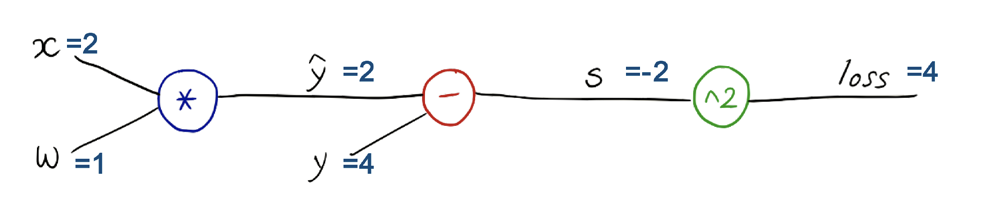

### pytorch 의 autograd 사용하지 않고, 직접 미분 식을 만들어주는 경우

In [44]:
import torch
import numpy as np

x = 2
y = 4
w = 1
grad = np.array([0.0])

def forward(x):
    return np.dot(x,w)

def error(x,y):
    y_pred = forward(x)
    s = y_pred - y
    return s

def gradient(x,y):
    return 2 * error(x,y) * x #chain_rule

def backward(x,y):
    global w
    grad[0] = gradient(x,y)
    w = w - 0.01*grad[0]
    return w

print("chain rule에 의한 gradient = ", gradient(x,y))
print("==============gradient decsent를 통해 w 업데이트 시작==============")

print("Prediction (before training)", forward(x).item())
for epoch in range(40):
    backward(x,y)
    print(f"Epoch: {epoch} | grad: {grad[0]}")

print("Prediction (after training)", forward(x).item())

chain rule에 의한 gradient =  -8
==============gradient decsent를 통해 w 업데이트 시작==============
Prediction (before training) 2
Epoch: 0 | grad: -8.0
Epoch: 1 | grad: -7.359999999999999
Epoch: 2 | grad: -6.7712
Epoch: 3 | grad: -6.229504
Epoch: 4 | grad: -5.731143680000001
Epoch: 5 | grad: -5.2726521856
Epoch: 6 | grad: -4.850840010752
Epoch: 7 | grad: -4.46277280989184
Epoch: 8 | grad: -4.105750985100492
Epoch: 9 | grad: -3.7772909062924533
Epoch: 10 | grad: -3.4751076337890563
Epoch: 11 | grad: -3.197099023085931
Epoch: 12 | grad: -2.941331101239056
Epoch: 13 | grad: -2.706024613139931
Epoch: 14 | grad: -2.4895426440887363
Epoch: 15 | grad: -2.2903792325616372
Epoch: 16 | grad: -2.1071488939567065
Epoch: 17 | grad: -1.9385769824401695
Epoch: 18 | grad: -1.7834908238449554
Epoch: 19 | grad: -1.6408115579373597
Epoch: 20 | grad: -1.5095466333023708
Epoch: 21 | grad: -1.388782902638182
Epoch: 22 | grad: -1.277680270427128
Epoch: 23 | grad: -1.1754658487929586
Epoch: 24 | grad: -1.08142858088952

### pytorch 의 autograd 사용

>  PyTorch의 Autograd를 이용해서 미분하시오 (이때 x = 1, y = 2, w1 = 1, w2 = 2, b = 2임)

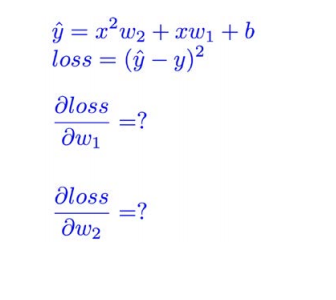


In [49]:
import torch
from torch import tensor

x = 1.0
y = 2.0
b = 2

w1 = torch.tensor([1.0], requires_grad=True)
w2 = torch.tensor([2.0], requires_grad=True)

#forward pass 함수
def forward(x):
    return x*x*w2 + x *w1 + b

def loss(x,y):
    y_pred = forward(x)
    s = y_pred - y
    return s*s

print("Prediction (before training)", forward(x).item())

for epoch in range(40):
    l = loss(x, y) #loss 함수를 실행시키면, forward까지 이루어져서 loss저장
    l.backward() #gradient를 직접 구할필요없이, 모든 변수마다 gradient 갱신하는 back propation 진행해줌!!(매우 유용)
    print("\tgrad: ", x, y, w1.grad.item(), w2.grad.item())
    w1.data = w1.data - 0.01 * w1.grad.item() #w1 gradient descent를 수행하는 부분 (갱신)
    w2.data = w2.data - 0.01 * w2.grad.item() #w2 gradient descent를 수행하는 부분 (갱신)
    w1.grad.data.zero_() # gradient인 미분값 w1을 다시 0으로 세팅해주어야함
    w2.grad.data.zero_() # gradient인 미분값 w2을 다시 0으로 세팅해주어야함 
print(f"Epoch: {epoch} | Loss: {l.item()}")

print("Prediction (after training)", forward(x).item())


Prediction (before training) 5.0
	grad:  1.0 2.0 6.0 6.0
	grad:  1.0 2.0 5.760000228881836 5.760000228881836
	grad:  1.0 2.0 5.529600143432617 5.529600143432617
	grad:  1.0 2.0 5.308416366577148 5.308416366577148
	grad:  1.0 2.0 5.0960798263549805 5.0960798263549805
	grad:  1.0 2.0 4.892236709594727 4.892236709594727
	grad:  1.0 2.0 4.69654655456543 4.69654655456543
	grad:  1.0 2.0 4.508685111999512 4.508685111999512
	grad:  1.0 2.0 4.328337669372559 4.328337669372559
	grad:  1.0 2.0 4.155203819274902 4.155203819274902
	grad:  1.0 2.0 3.9889955520629883 3.9889955520629883
	grad:  1.0 2.0 3.8294363021850586 3.8294363021850586
	grad:  1.0 2.0 3.6762585639953613 3.6762585639953613
	grad:  1.0 2.0 3.529208183288574 3.529208183288574
	grad:  1.0 2.0 3.388040065765381 3.388040065765381
	grad:  1.0 2.0 3.252518653869629 3.252518653869629
	grad:  1.0 2.0 3.12241792678833 3.12241792678833
	grad:  1.0 2.0 2.99752140045166 2.99752140045166
	grad:  1.0 2.0 2.8776206970214844 2.8776206970214844
	gr